<a href="https://colab.research.google.com/github/SerbC/04-ELECTRONICA-M-A1-S1-CV1F-SIVA-2022/blob/main/Laborator_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python ipyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import numpy as np
from glob import glob
import random
import ipyplot
from matplotlib import pyplot as plt 


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


In [4]:
base_path = "/content/drive/MyDrive/fac/Laborator/Images/"
file_list =[]
for i in range(4):
  one_class_folder = glob(base_path+str(i)+"/*.jpg")
  file_list.append(one_class_folder)

  print(file_list) #printam ce poze am gasit



[['/content/drive/MyDrive/fac/Laborator/Images/0/0.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/1.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/2.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/4.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/5.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/7.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/8.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/9.jpg']]
[['/content/drive/MyDrive/fac/Laborator/Images/0/0.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/1.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/2.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/4.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/5.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/7.jpg', '/con

In [5]:
random.seed(42)
indexes = random.sample(range(0,9), 7)
print(indexes)

[1, 0, 5, 2, 8, 4, 7]


In [8]:
train_files = []
test_files = []
for f in file_list:
  t = []
  for el in indexes:
    t.append(f[el])
  train_files.append(t)
  test_files.append([x for x in f if x not in t])

print(test_files)
print(np.shape(train_files))
print(np.shape(test_files))

[['/content/drive/MyDrive/fac/Laborator/Images/0/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/9.jpg'], ['/content/drive/MyDrive/fac/Laborator/Images/1/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/9.jpg'], ['/content/drive/MyDrive/fac/Laborator/Images/2/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/2/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/2/9.jpg'], ['/content/drive/MyDrive/fac/Laborator/Images/3/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/3/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/3/9.jpg']]
(4, 7)
(4, 3)


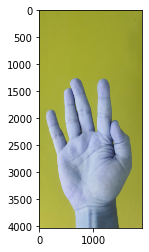

In [15]:
from google.colab.patches import cv2_imshow
im = cv2.imread('/content/drive/MyDrive/fac/Laborator/Images/0/3.jpg')
#cv2.imshow("sh", im)
#cv2_imshow(im) # ATENTIE LA SPATIILE DE CULOARE>>>AU AUTOMATIZAT CONVERSIA
#ipyplot.plot_images(im)#, max_images = 1, img_width= 456)
plt.imshow(im)


(4032, 1908, 3)


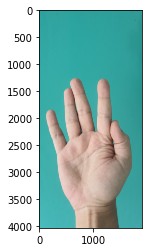

In [17]:
# IMAGINEA ESTE CITITA IN BGR SI TREBUIE SCHIMBAT SPATIUL DE CULOARE!
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
print(np.shape(im_rgb))

(806, 381, 3)


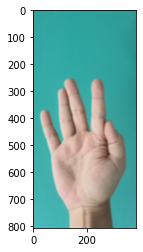

In [49]:
im_rgb_small = cv2.resize(im_rgb,(int(im_rgb.shape[1] *0.2), int(im_rgb.shape[0] * 0.2)))
im_rgb_small = cv2.blur(im_rgb_small, (7,7))
plt.imshow(im_rgb_small)
print(np.shape(im_rgb_small))

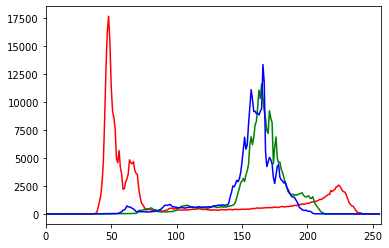

In [50]:
color = ('r', 'g', 'b')
for i, col in enumerate(color):
  hist = cv2.calcHist([im_rgb_small], [i],None, [256], [0, 256])
  plt.plot(hist, color =col)
  plt.xlim([0,256])
plt.show()

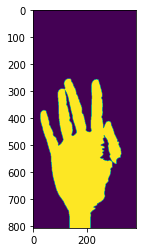

In [51]:
mask = im_rgb_small[...,0]>150
plt.imshow(mask)


In [52]:
print(im_rgb_small[0,0,:])

[ 48 164 159]


In [53]:
# culoare asemanatoare
def sim_col(v):
  if abs(v[0] - 46) < 70 and abs(v[1] - 163) < 70 and abs(v[2] - 157) < 70:
    return (0,0,0)
  return (255,255,255)


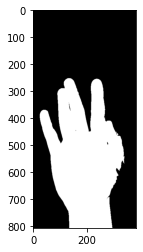

In [54]:
mask2 = im_rgb_small.copy()
for i in range(im_rgb_small.shape[1]):
  for j in range(im_rgb_small.shape[0]):
     mask2[j,i] = sim_col(im_rgb_small[j,i])
plt.imshow(mask2)

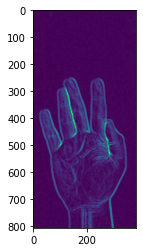

In [55]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

gray = cv2.cvtColor(im_rgb_small, cv2.COLOR_BGR2GRAY) #IMAGINEA IN GRAYSCALE
grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT) #SOBEl PE X
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT) #SOBEl PE Y

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

plt.imshow(grad)
